## Data Processing

In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
def normalize(col, df):
    x = df[col].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    
    return pd.DataFrame(x_scaled, columns = col)

def sumandtotal(x, col, df):
    df[x + '_sum'] = df.sum(axis = 1)
    df[x + '_total'] = len(col)
    
    return df   

In [3]:
df = pd.read_excel('BSA_December 13, 2019_08.56.xlsx').iloc[1:, 5:].reset_index(drop = True)
df1 = pd.read_excel('BSA - MTurk_December 13, 2019_18.48.xlsx').iloc[1:,:].reset_index(drop = True)
df1 = df1.loc[df1['Finished'] == 'True',:]

In [7]:
#dictionary
num_p = {'Strongly disagree': 1, 'Disagree': 2, 'Somewhat disagree': 3, 'Neither agree nor disagree': 4,\
         'Somewhat agree': 5, 'Agree': 6, 'Strongly agree': 7}
num_n = {'Strongly disagree': 7, 'Disagree': 6, 'Somewhat disagree': 5, 'Neither agree nor disagree': 4,\
         'Somewhat agree': 3, 'Agree': 2, 'Strongly agree': 1}
c4 = {'Several times a week or more': 7, 'About once a week': 5.5, 'Several times a month': 4,\
      'About once a month': 2.5, 'Less than once a month': 1}
c5 = {'Never had occasion to do this during the past year': 1, 'Once or twice': 2.5, 'About five times': 4,\
      'Six to 10 times': 5.5, 'More than 10 times': 7}
c7 = {'Yes': 0, 'No': 1}
c8 = {1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1}
f5 = {'Three or more times per week': 7, 'Twice per week': 5.5, 'Once per week': 4, 'Less than once per week': 2.5,\
      'Almost no exercise': 1}
ct5 = {'Yes': 1, 'No': 0}
ct10 = {'$1 - $20': 1, '$21 - $50': 1.86, '$51 - $100': 2.71, '$100 - $500': 3.57, '$501 - $1000': 4.43, \
        '$1001 - $5000': 5.29, '$5001 - $10000': 6.14, '$10001 and up': 7, 'Prefer not to disclose': 4}
ct12 = {'0 - $9,999': 1, '$10,000 - $24,999': 1.67, '$25,000 - 49,999': 2.33, \
        '$50,000 - $74,999': 3, '$75,000 - $99,999': 3.67, '$100,000 - $124,999': 4.33, \
        '$125,000 - $149,999': 5, '$150,000 - $174,999': 5.67, '$175,000 - $199,999': 6.33, \
        '$200,000 and up': 7, 'Prefer not to answer': 4}
ct13 = {'750 and above': 7, '700 - 749': 5.5, '650 - 699': 4, '550 - 649': 2.5, '549 and below': 1, 'I don’t know': 4}
ct14 = {"I didn't go to college": 4, "I went to college, but didn't take out student loans": 4, \
        "I'm still paying off my student loans": 4, 'Within 10 years': 4, 'Within 5 years': 7, 'More than 10 years': 1}
ct16 = {'Yes': 1, 'No': 0}
bs3 = {'Yes': 1, 'No': 0}
normalize = {1:0, 1.67:0.11, 1.86:0.14, 2:0.17, \
             2.33:0.22, 2.5:0.25, 2.71:0.29, \
             3:0.33, 3.57:0.43, 3.67:0.44, \
             4:0.50, 4.33: 0.56, 4.43:0.57, \
             5:0.67, 5.29: 0.71, 5.5:0.75, 5.67:0.78, \
             6:0.83, 6.14:0.86, 6.33:0.89, \
             7:1}

In [8]:
#df
#demo
df['bs1'] = df['bs1'].fillna(0)
df['bs2'] = df['bs2'].fillna(0).apply(lambda x: len(str(x).split(',')) if x != 0 else 0)
df['bs3'] = df['bs3'].fillna('No').map(bs3)
df['bs4_1'] = df['bs4_1'].fillna(0).apply(lambda x: str(x).split()[0])
df_d = pd.concat([df['bs1'], df['bs2'], df['bs3'], df['bs4_1']], axis = 1)


#leadership
l = []
for i in df.columns:
    if 'l' in i:
        l.append(i)
l = l[3:]
df_l = df[l]

l_p = ['l1_1', 'l2_1', 'l2_4', 'l3_2', 'l3_3', 'l3_4', 'l4_1', 'l4_2', 'l4_3', 'l4_4']
l_n = [i for i in l if i not in l_p]

for i in l_p:
    df_l[i] = df_l[i].map(num_p)
for i in l_n:
    df_l[i] = df_l[i].map(num_n)


#character
c = df.columns[71:97]
c_split = ['c1_1', 'c8_1', 'c8_2', 'c8_3', 'c8_4', 'c8_5', 'c8_6', 'c9_1', 'c10_1']
c_n = ['c2_3']
c_o = ['c4', 'c5', 'c7']
c_p = [i for i in c if (i not in c_n) & (i not in c_split) & (i not in c_o)]
df_c = df[c]

for i in c_split:
    df_c[i] = df_c[i].apply(lambda x: int(x.split()[0]))

for i in c_split[1:7]:
    df_c[i] = df_c[i].map(c8)
    
for i in c_p:
    df_c[i] = df_c[i].map(num_p)

df_c['c2_3'] = df_c['c2_3'].map(num_n)
df_c['c4'] = df_c['c4'].apply(lambda x: x.strip()).map(c4)
df_c['c5'] = df_c['c5'].apply(lambda x: x.strip()).map(c5)
df_c['c7'] = df_c['c7'].map(c7)


#fitness
f = df.columns[97:108]
f_split = ['f4_1', 'f1_1']
f_n = ['f2_1', 'f2_2']
f_o = ['f5']
f_p = [i for i in f if (i not in f_n) & (i not in f_split) & (i not in f_o)]
df_f = df[f]

for i in f_split:
    df_f[i] = df_f[i].apply(lambda x: x.split()[0])
    
for i in f_p:
    df_f[i] = df_f[i].map(num_p)
    
for i in f_n:
    df_f[i] = df_f[i].map(num_n)

df_f['f5'] = df_f['f5'].apply(lambda x: x.strip()).map(f5)


#citizenship
ct = df.columns[27:53]
ct_o = ['ct12', 'ct13', 'ct14', 'ct16', 'ct4', 'ct5', 'ct6_1', 'ct10']
ct_split = ['ct15_1', 'ct9_1']
ct_p = [i for i in ct if (i not in ct_o) & (i not in ct_split)]
df_ct = df[ct]

for i in ct_split:
    df_ct[i] = df_ct[i].apply(lambda x: x.split()[0])
    
for i in ct_p:
    df_ct[i] = df_ct[i].map(num_p)

df_ct['ct12'] = df_ct['ct12'].apply(lambda x: x.strip()).map(ct12) 
df_ct['ct13'] = df_ct['ct13'].apply(lambda x: x.strip()).map(ct13) 
df_ct['ct14'] = df_ct['ct14'].apply(lambda x: x.strip()).map(ct14) 
df_ct['ct16'] = df_ct['ct16'].map(ct16)    
df_ct['ct10'] = df_ct['ct10'].apply(lambda x: x.strip()).map(ct10)    
df_ct['ct5'] = df_ct['ct5'].map(ct5)   
df_ct['ct6_1'] = df_ct['ct6_1'].apply(lambda x: 1 if int(x) == 0 else x)


df_4 = pd.concat([df_ct, df_c, df_f, df_l, df_d, df['bs']], axis = 1)

In [9]:
#df1
#demo
df1['bs1'] = df1['bs1'].fillna(0)
df1['bs2'] = df1['bs2'].fillna(0).apply(lambda x: len(str(x).split(',')) if x != 0 else 0)
df1['bs3'] = df1['bs3'].fillna('No').map(bs3)
df1['bs4_1'] = df1['bs4_1'].fillna(0).apply(lambda x: str(x).split()[0])
df1_d = pd.concat([df1['bs1'], df1['bs2'], df1['bs3'], df1['bs4_1']], axis = 1)


#leadership
df1_l = df1[l]

for i in l_p:
    df1_l[i] = df1_l[i].map(num_p)
for i in l_n:
    df1_l[i] = df1_l[i].map(num_n)
    

#character
df1_c = df1[c]

for i in c_split:
    df1_c[i] = df1_c[i].apply(lambda x: x.split()[0])

for i in c_p:
    df1_c[i] = df1_c[i].map(num_p)

df1_c['c2_3'] = df1_c['c2_3'].map(num_n)
df1_c['c4'] = df1_c['c4'].apply(lambda x: x.strip()).map(c4)
df1_c['c5'] = df1_c['c5'].apply(lambda x: x.strip()).map(c5)
df1_c['c7'] = df1_c['c7'].map(c7)
df1_c['c_total'] = df1_c.sum(axis = 1)
df_c['ct_sum'] = df_c.sum(axis = 1)


#fitness
df1_f = df1[f]

for i in f_split:
    df1_f[i] = df1_f[i].apply(lambda x: x.split()[0])
    
for i in f_p:
    df1_f[i] = df1_f[i].map(num_p)
    
for i in f_n:
    df1_f[i] = df1_f[i].map(num_n)

df1_f['f5'] = df1_f['f5'].apply(lambda x: x.strip()).map(f5)


#citizenship
df1_ct = df1[ct]

for i in ct_split:
    df1_ct[i] = df1_ct[i].apply(lambda x: x.split()[0])
    
for i in ct_p:
    df1_ct[i] = df1_ct[i].map(num_p)

df1_ct['ct12'] = df1_ct['ct12'].apply(lambda x: x.strip()).map(ct12) 
df1_ct['ct13'] = df1_ct['ct13'].apply(lambda x: x.strip()).map(ct13) 
df1_ct['ct14'] = df1_ct['ct14'].apply(lambda x: x.strip()).map(ct14) 
df1_ct['ct16'] = df1_ct['ct16'].map(ct16)    
df1_ct['ct10'] = df1_ct['ct10'].apply(lambda x: x.strip()).map(ct10)    
df1_ct['ct5'] = df1_ct['ct5'].map(ct5)    
df1_ct['ct6_1'] = df1_ct['ct6_1'].apply(lambda x: 1 if int(x) == 0 else x)


df1_4 = pd.concat([df1_ct, df1_c, df1_f, df1_l, df1_d, df1['bs']], axis = 1)

In [14]:
df4 = pd.concat([df_4, df1_4], axis = 0).reset_index(drop = True)

In [15]:
for i in df4.columns[5:]:
    df4[i] = df4[i].apply(lambda x: float(x)).map(normalize)

In [16]:
df4['l_total'] = len(l)
df4['c_total'] = len(c)
df4['ct_total'] = len(ct)
df4['f_total'] = len(f)

In [17]:
df4['l_sum'] = df4[l].sum(axis=1)
df4['c_sum'] = df4[c].sum(axis=1)
df4['ct_sum'] = df4[ct].sum(axis=1)
df4['f_sum'] = df4[f].sum(axis=1)
df4['total'] = df4['l_sum'] + df4['c_sum'] + df4['ct_sum'] + df4['f_sum']

In [18]:
df4.to_csv('df4.csv',index=False)

## Clustering

In [19]:
df4['l_sum'] = df4['l_sum'].apply(lambda x: x*25/18)
df4['f_sum'] = df4['f_sum'].apply(lambda x: x*25/11)
df4['c_sum'] = df4['c_sum'].apply(lambda x: x*25/26)
df4['ct_sum'] = df4['ct_sum'].apply(lambda x: x*25/26)
df4['total'] = df4['l_sum'] + df4['f_sum'] + df4['c_sum'] + df4['ct_sum']

In [20]:
df4.head()

,bs,bs1,bs2,bs3,bs4_1,c10_1,c1_1,c2_1,c2_2,c2_3,...,l4_3,l4_4,l_total,ct_total,f_total,l_sum,c_sum,ct_sum,f_sum,total
0,0,0,0,0,0,0.67,0.67,0.67,0.50,0.83,...,0.50,0.67,18,26,11,17.333333,18.500000,12.182692,14.204545,62.220571
1,1,10,1,0,5,0.67,0.67,1.00,0.50,0.83,...,0.83,1.00,18,26,11,20.347222,20.346154,18.682692,16.477273,75.853341
2,1,4,1,0,4,1.00,0.50,0.83,0.33,0.67,...,0.83,0.67,18,26,11,16.694444,20.644231,19.855769,14.772727,71.967172
3,1,8,1,1,5,0.67,0.83,1.00,0.83,0.83,...,0.83,1.00,18,26,11,16.638889,19.778846,18.086538,18.727273,73.231546
4,0,0,0,0,0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,18,26,11,20.361111,23.067308,4.519231,22.727273,70.674922


In [21]:
df0 = df4[['l_sum','c_sum','ct_sum','f_sum','total','bs1','bs2','bs3','bs4_1','bs']]

avg = df0.loc[df0['bs']=='1',['l_sum','c_sum','ct_sum','f_sum','total']].mean()
avg

l_sum     15.878535
c_sum     18.308566
ct_sum    16.109965
f_sum     18.514050
total     68.811116
dtype: float64

In [22]:
a = df0.groupby('bs')['l_sum','c_sum','ct_sum','f_sum','total'].mean().T
a['%'] = (a['1']-a['0'])/a['0']
a

bs,0,1,%
l_sum,15.344444,15.878535,0.034807
c_sum,14.851282,18.308566,0.232794
ct_sum,12.994231,16.109965,0.239778
f_sum,17.244949,18.514050,0.073593
total,60.434907,68.811116,0.138599


In [23]:
l = df0.loc[df0['bs']=='1',['l_sum','bs1']]
c = df0.loc[df0['bs']=='1',['c_sum','bs1']]
ct = df0.loc[df0['bs']=='1',['ct_sum','bs1']]
f = df0.loc[df0['bs']=='1',['f_sum','bs1']]
t = df0.loc[df0['bs']=='1',['total','bs1']]

In [24]:
plt.style.use('ggplot')

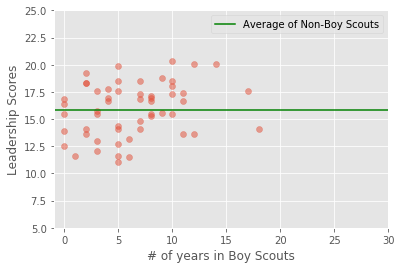

In [25]:
fig, ax = plt.subplots()
plt.scatter(l['bs1'], l['l_sum'], alpha=0.5)
plt.axhline(y=avg[0], color='g', linestyle='-')
plt.ylim(5, 25)
plt.xlim(-1, 30)
labels = ["Average of Non-Boy Scouts"]
ax.set_xlabel('# of years in Boy Scouts')
ax.set_ylabel('Leadership Scores')
plt.legend(labels=labels)

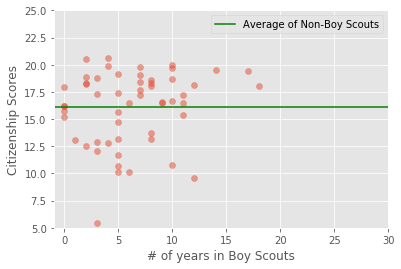

In [26]:
fig, ax = plt.subplots()
plt.scatter(ct['bs1'], ct['ct_sum'], alpha=0.5)
plt.axhline(y=avg[2], color='g', linestyle='-')
plt.ylim(5, 25)
plt.xlim(-1, 30)
labels = ["Average of Non-Boy Scouts"]
ax.set_xlabel('# of years in Boy Scouts')
ax.set_ylabel('Citizenship Scores')
plt.legend(labels=labels)

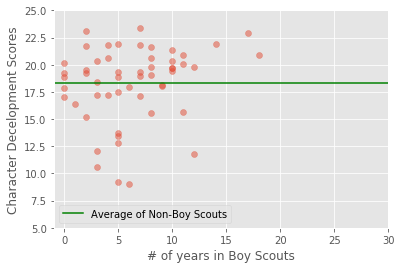

In [27]:
fig, ax = plt.subplots()
plt.scatter(c['bs1'], c['c_sum'], alpha=0.5)
plt.axhline(y=avg[1], color='g', linestyle='-')
plt.ylim(5, 25)
plt.xlim(-1, 30)
labels = ["Average of Non-Boy Scouts"]
ax.set_xlabel('# of years in Boy Scouts')
ax.set_ylabel('Character Decelopment Scores')
plt.legend(labels=labels)

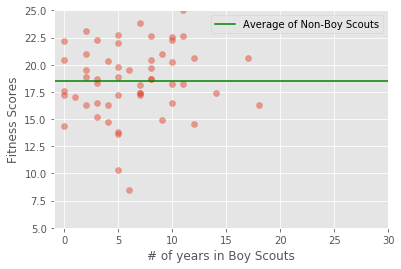

In [28]:
fig, ax = plt.subplots()
plt.scatter(f['bs1'], f['f_sum'], alpha=0.5)
plt.axhline(y=avg[3], color='g', linestyle='-')
plt.ylim(5, 25)
plt.xlim(-1, 30)
labels = ["Average of Non-Boy Scouts"]
ax.set_xlabel('# of years in Boy Scouts')
ax.set_ylabel('Fitness Scores')
plt.legend(labels=labels)

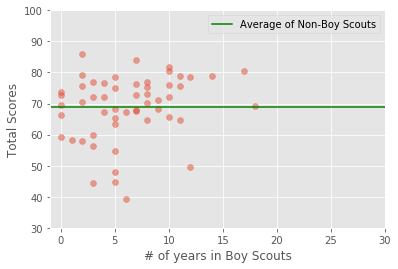

In [29]:
fig, ax = plt.subplots()
plt.ylim(30, 100)
plt.xlim(-1, 30)
plt.scatter(t['bs1'], t['total'], alpha=0.5)
plt.axhline(y=avg[4], color='g', linestyle='-')
labels = ["Average of Non-Boy Scouts"]
ax.set_xlabel('# of years in Boy Scouts')
ax.set_ylabel('Total Scores')
plt.legend(labels=labels)

In [30]:
teamwork = ['l1_1','l1_2','l1_3','l1_4','l1_5','l1_6']
takeroles = ['l2_1','l2_2','l2_3','l2_4']
public = ['l3_1','l3_2','l3_3','l3_4']
goal = ['l4_1','l4_2','l4_3','l4_4']

selfconfidence = ['c2_1','c2_2','c2_3','l2_4']

## Key Impact Analysis

In [31]:
df0 = pd.read_csv("BSA_data.csv")
df0.head()

,bs,bs1,bs2,bs2_1,bs3,bs4_1,c10_1,c1_1,c2_1,c2_2,...,f_total,l_sum,c_sum,ct_sum,f_sum,l_avg,c_avg,ct_avg,f_avg,total
0,0,0,0,0,0,0,0.67,0.67,0.67,0.50,...,11,12.48,19.24,12.67,6.25,17.33,18.50,12.18,14.20,50.64
1,1,10,2,1,0,5,0.67,0.67,1.00,0.50,...,11,14.65,21.16,19.43,7.25,20.35,20.35,18.68,16.48,62.49
2,1,10,2,2,0,5,0.67,0.67,1.00,0.50,...,11,14.65,21.16,19.43,7.25,20.35,20.35,18.68,16.48,62.49
3,1,4,1,1,0,4,1.00,0.50,0.83,0.33,...,11,12.02,21.47,20.65,6.50,16.69,20.64,19.86,14.77,60.64
4,1,8,3,1,1,5,0.67,0.83,1.00,0.83,...,11,11.98,20.57,18.81,8.24,16.64,19.78,18.09,18.73,59.60


In [34]:
# Scouts and Non-Scouts score comparison in four key impacts
df0_ct = sqldf("SELECT AVG(ct_avg), bs FROM df0 GROUP BY bs")
df0_l = sqldf("SELECT AVG(l_avg), bs FROM df0 GROUP BY bs")
df0_c = sqldf("SELECT AVG(c_avg), bs FROM df0 GROUP BY bs")
df0_f = sqldf("SELECT AVG(f_avg), bs FROM df0 GROUP BY bs")
df0_total = sqldf("SELECT AVG(total), bs FROM df0 GROUP BY bs")
print(df0_ct)
print(df0_l)
print(df0_c)
print(df0_f)
print(df0_total)

   AVG(ct_avg)  bs
0    12.994889   0
1    16.060215   1
   AVG(l_avg)  bs
0   15.344667   0
1   15.884194   1
   AVG(c_avg)  bs
0   14.852222   0
1   18.300860   1
   AVG(f_avg)  bs
0   17.244444   0
1   18.621613   1
   AVG(total)  bs
0   47.595111   0
1   55.364194   1


In [35]:
# Non-Scouts and Cub/Boy/Venturing Scouts score comparison in four key impacts
df0_ct_p = sqldf("SELECT AVG(ct_avg), bs2_1 FROM df0 GROUP BY bs2_1")
df0_l_p = sqldf("SELECT AVG(l_avg), bs2_1 FROM df0 GROUP BY bs2_1")
df0_c_p = sqldf("SELECT AVG(c_avg), bs2_1 FROM df0 GROUP BY bs2_1")
df0_f_p = sqldf("SELECT AVG(f_avg), bs2_1 FROM df0 GROUP BY bs2_1")
df0_total_p = sqldf("SELECT AVG(total), bs2_1 FROM df0 GROUP BY bs2_1")
print(df0_ct_p)
print(df0_l_p)
print(df0_c_p)
print(df0_f_p)
print(df0_total_p)

   AVG(ct_avg)  bs2_1
0    12.994889      0
1    16.070208      1
2    15.814595      2
3    17.136250      3
   AVG(l_avg)  bs2_1
0   15.344667      0
1   15.838958      1
2   15.851622      2
3   16.306250      3
   AVG(c_avg)  bs2_1
0   14.852222      0
1   18.214792      1
2   18.100811      2
3   19.742500      3
   AVG(f_avg)  bs2_1
0   17.244444      0
1   18.477917      1
2   18.689459      2
3   19.170000      3
   AVG(total)  bs2_1
0   47.595111      0
1   55.189375      1
2   54.907297      2
3   58.526250      3


In [36]:
# # of yrs membership vs. four impact scores
df0_ct_y = sqldf("SELECT AVG(ct_avg) AS avg_ct, bs1 FROM df0 GROUP BY bs1")
df0_l_y = sqldf("SELECT AVG(l_avg) AS avg_l, bs1 FROM df0 GROUP BY bs1")
df0_c_y = sqldf("SELECT AVG(c_avg) AS avg_c, bs1 FROM df0 GROUP BY bs1")
df0_f_y = sqldf("SELECT AVG(f_avg) AS avg_f, bs1 FROM df0 GROUP BY bs1")
print(df0_ct_y)
print(df0_l_y)
print(df0_c_y)
print(df0_f_y)

       avg_ct  bs1
0   13.530556    0
1   13.070000    1
2   17.682000    2
3   13.064286    3
4   17.753333    4
5   13.203333    5
6   12.246667    6
7   18.658000    7
8   16.553636    8
9   16.510000    9
10  17.162000   10
11  16.350000   11
12  13.865000   12
13  19.490000   14
14  19.390000   17
15  18.030000   18
16  17.750000   38
        avg_l  bs1
0   15.212407    0
1   11.600000    1
2   16.710000    2
3   14.617143    3
4   17.123333    4
5   14.721667    5
6   12.103333    6
7   16.602000    7
8   16.330909    8
9   17.150000    9
10  17.940000   10
11  16.111429   11
12  16.865000   12
13  20.080000   14
14  17.560000   17
15  14.130000   18
16  12.970000   38
        avg_c  bs1
0   15.452407    0
1   16.400000    1
2   19.752000    2
3   15.402857    3
4   19.916667    4
5   14.985833    5
6   12.003333    6
7   20.540000    7
8   19.372727    8
9   18.070000    9
10  20.102000   10
11  19.070000   11
12  15.770000   12
13  21.940000   14
14  22.900000   17
15  20.88000

Text(18.05228913787737, 9, 'mean score for Fitness/Wellbeing = 18.03')

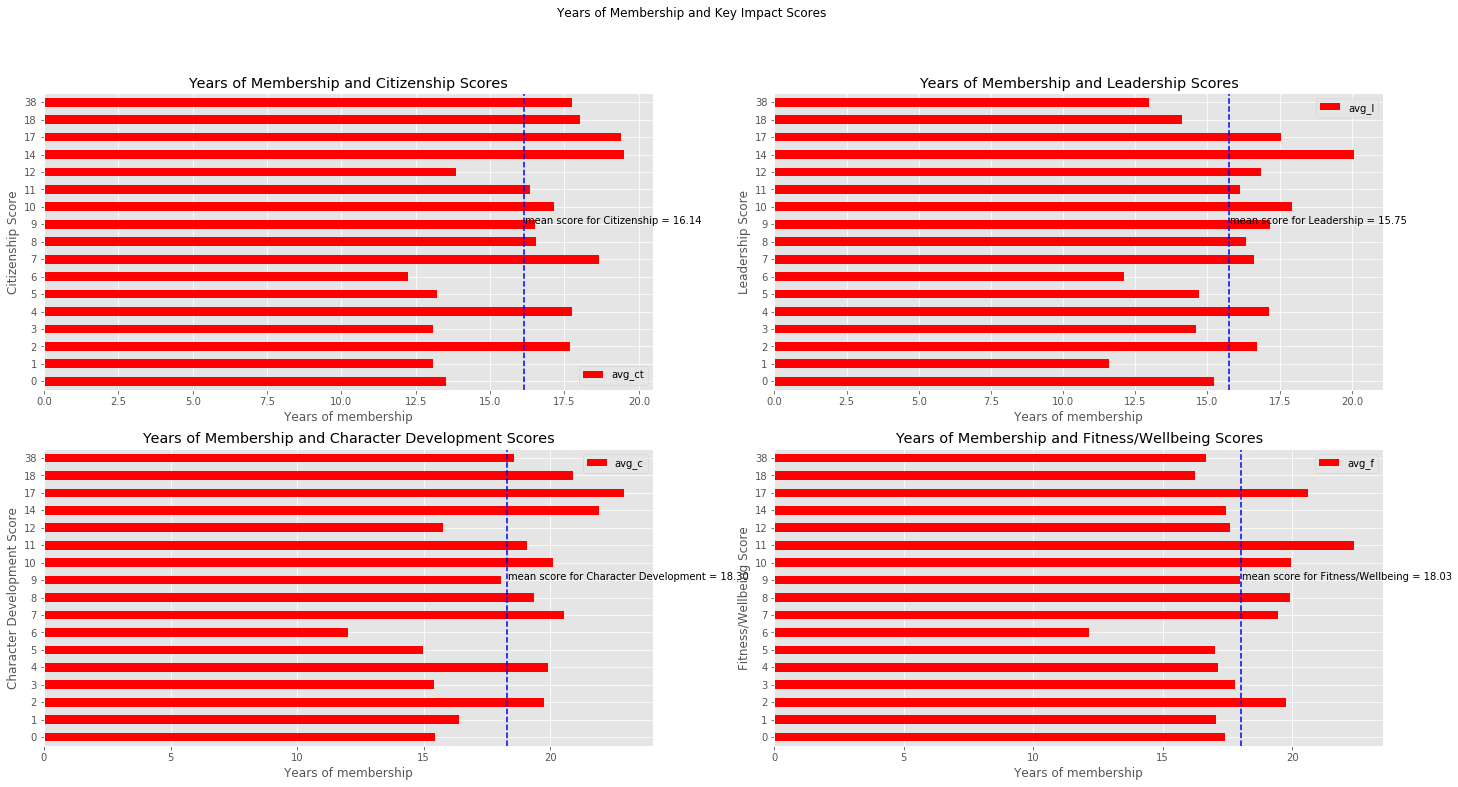

In [37]:
plt.style.use("ggplot")
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2, ncols = 2, figsize = (24,12), sharey = False)
fig.suptitle("Years of Membership and Key Impact Scores")

df0_ct_y.plot(kind = "barh", x = "bs1", y = "avg_ct", color = "r", ax = ax0)
ax0.set(title = "Years of Membership and Citizenship Scores", xlabel = "Years of membership", ylabel = "Citizenship Score")
mean_df0_ct_y = df0_ct_y.avg_ct.mean()
ax0.axvline(mean_df0_ct_y, color = "b", linestyle = "--")
text0 = "mean score for Citizenship = %0.2f"%mean_df0_ct_y
ax0.annotate(text0, xy = (mean_df0_ct_y+0.02,9))

df0_l_y.plot(kind = "barh", x = "bs1", y = "avg_l", color = "r", ax = ax1)
ax1.set(title = "Years of Membership and Leadership Scores", xlabel = "Years of membership", ylabel = "Leadership Score")
mean_df0_l_y = df0_l_y.avg_l.mean()
ax1.axvline(mean_df0_l_y, color = "b", linestyle = "--")
text1 = "mean score for Leadership = %0.2f"%mean_df0_l_y
ax1.annotate(text1, xy = (mean_df0_l_y+0.02,9))

df0_c_y.plot(kind = "barh", x = "bs1", y = "avg_c", color = "r", ax = ax2)
ax2.set(title = "Years of Membership and Character Development Scores", xlabel = "Years of membership", ylabel = "Character Development Score")
mean_df0_c_y = df0_c_y.avg_c.mean()
ax2.axvline(mean_df0_c_y, color = "b", linestyle = "--")
text2 = "mean score for Character Development = %0.2f"%mean_df0_c_y
ax2.annotate(text2, xy = (mean_df0_c_y+0.02,9))

df0_f_y.plot(kind = "barh", x = "bs1", y = "avg_f", color = "r", ax = ax3)
ax3.set(title = "Years of Membership and Fitness/Wellbeing Scores", xlabel = "Years of membership", ylabel = "Fitness/Wellbeing Score")
mean_df0_f_y = df0_f_y.avg_f.mean()
ax3.axvline(mean_df0_f_y, color = "b", linestyle = "--")
text3 = "mean score for Fitness/Wellbeing = %0.2f"%mean_df0_f_y
ax3.annotate(text3, xy = (mean_df0_f_y+0.02,9))